In [5]:
from sklearn.datasets import make_moons, make_circles, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from numpy import arange, meshgrid, savetxt, c_, array

from matplotlib import pyplot

from pandas import DataFrame, read_csv

from seaborn import barplot,heatmap

In [6]:
make_moons(n_samples=2000,random_state=32,noise=0.05)

(array([[ 0.956811  , -0.61614037],
        [ 0.68302036,  0.82116694],
        [-0.32186187,  0.86997687],
        ...,
        [ 2.0135734 ,  0.26477425],
        [ 1.2740586 , -0.49498708],
        [-0.63790154,  0.64185018]]), array([1, 0, 0, ..., 1, 1, 0]))

In [7]:
def plot(datasets):
    figure = pyplot.figure(figsize=(17, 9))
    i = 1
    h = .02
    for X, y in datasets:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = meshgrid(arange(x_min, x_max, h),
                             arange(y_min, y_max, h))
        cm = pyplot.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = pyplot.subplot(len(datasets), 1, i)

        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

    figure.subplots_adjust(left=.02, right=.98)
    pyplot.show()

In [8]:
datasets_ll = [make_moons(n_samples=2000,random_state=32,noise=0.05),
            make_circles(n_samples=2000,factor=0.7,noise=0.05,random_state=55),
            make_blobs(n_samples=2000,centers=[(2,2),(1.5,1.5)],cluster_std=[0.05, 0.05], random_state=8)]
datasets_lh = [make_moons(n_samples=2000,random_state=32,noise=0.3),
            make_circles(n_samples=2000,factor=0.7,noise=0.3,random_state=55),
            make_blobs(n_samples=2000,centers=[(2,2),(1.5,1.5)],cluster_std=[0.3, 0.3], random_state=8)]
datasets_sl = [make_moons(n_samples=200,random_state=32,noise=0.05),
            make_circles(n_samples=200,factor=0.7,noise=0.05,random_state=55),
            make_blobs(n_samples=200,centers=[(2,2),(1.5,1.5)],cluster_std=[0.05, 0.05], random_state=8)]
datasets_sh = [make_moons(n_samples=200,random_state=32,noise=0.3),
            make_circles(n_samples=200,factor=0.7,noise=0.3,random_state=55),
            make_blobs(n_samples=200,centers=[(2,2),(1.5,1.5)],cluster_std=[0.3, 0.3], random_state=8)]

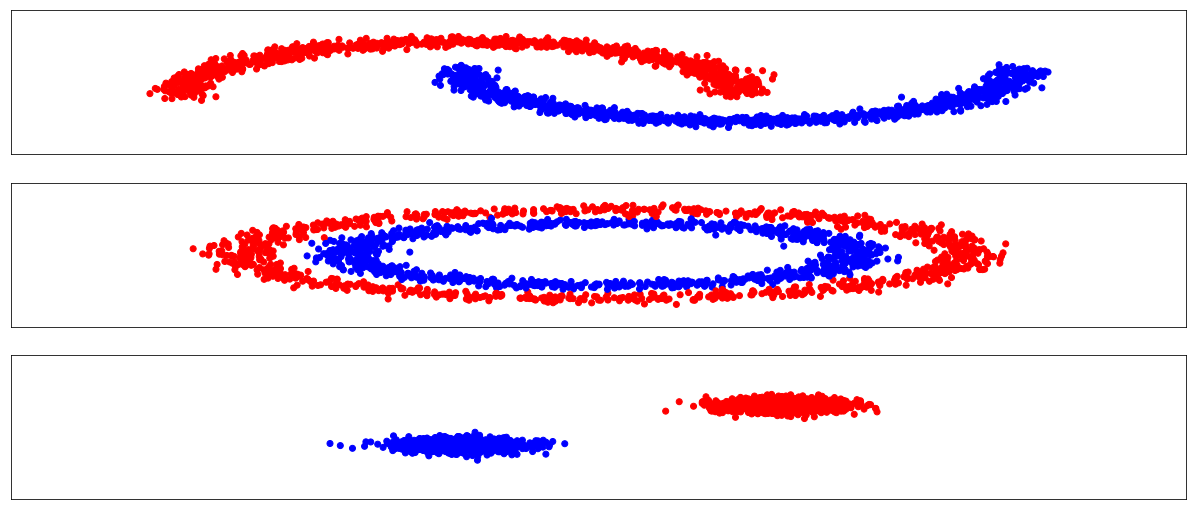

In [9]:
plot(datasets_ll)

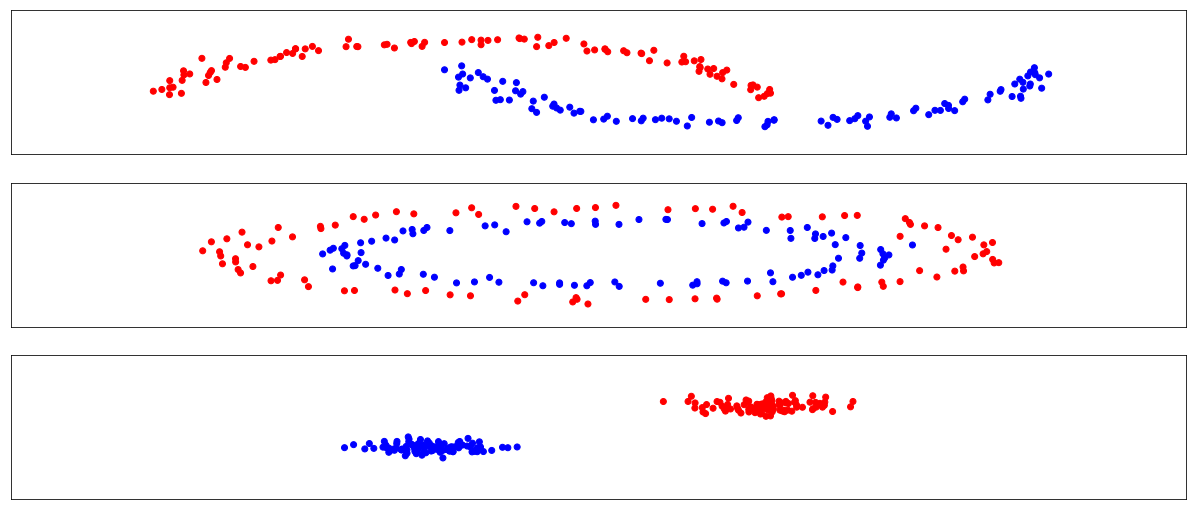

In [10]:
plot(datasets_sl)

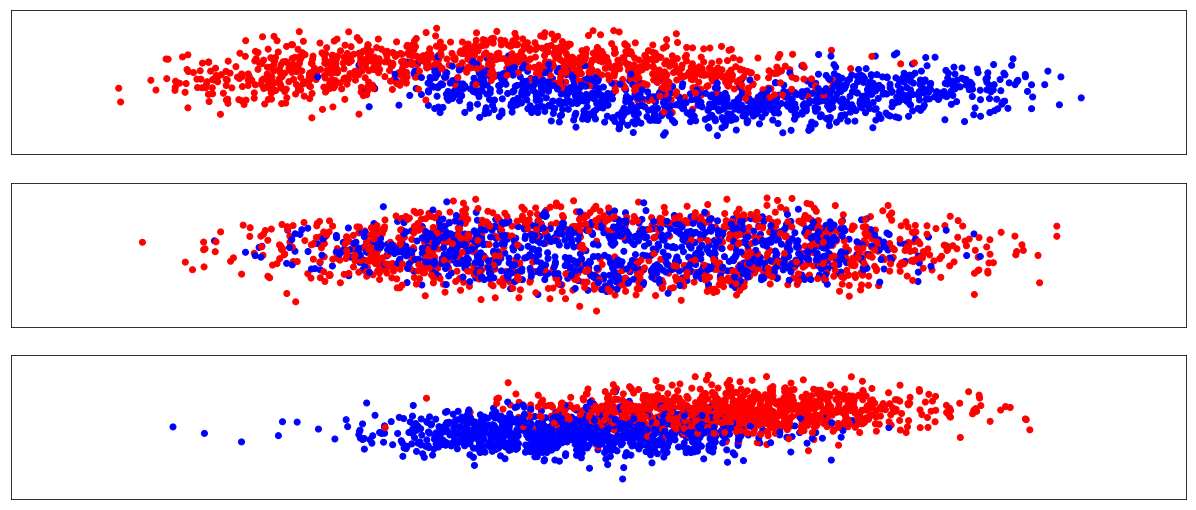

In [11]:
plot(datasets_lh)

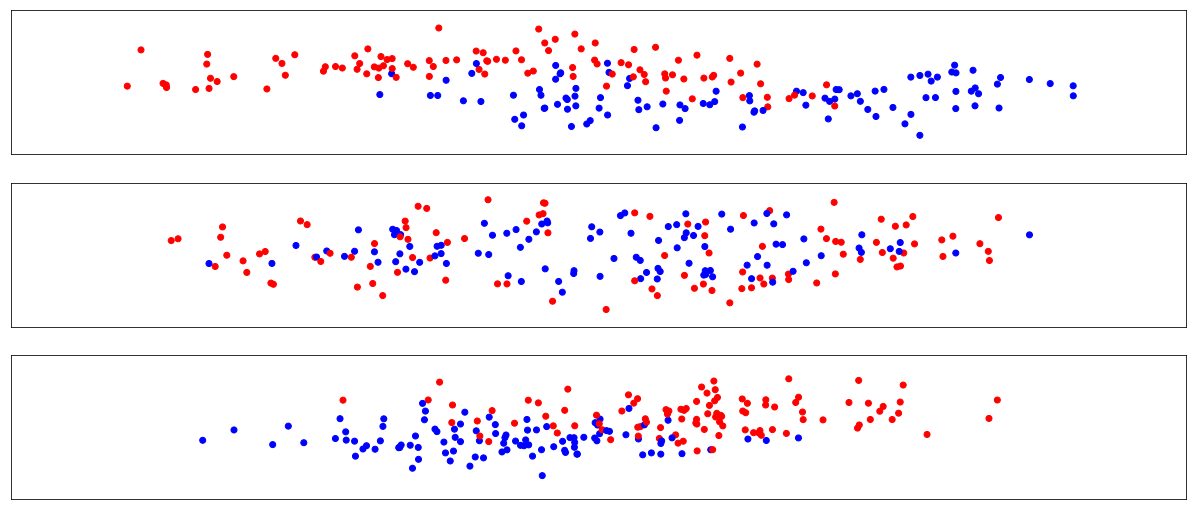

In [12]:
plot(datasets_sh)

In [33]:
def saveDataset(data,size,noise):
    names = ['moon','circle','blob']
    i = 0
    for dt in data:
        print(dt)
        X = dt[0]
        y = dt[1]
        savetxt('%s_%s_%s.txt' % (names[i],size,noise), c_[X,y], fmt='%f', 
                                                                 delimiter=" ",
                                                                newline="\n")
        i+=1

In [34]:
saveDataset(datasets_ll,'large','low')
saveDataset(datasets_lh,'large','high')
saveDataset(datasets_sl,'small','low')
saveDataset(datasets_sh,'small','high')

(array([[ 0.956811  , -0.61614037],
       [ 0.68302036,  0.82116694],
       [-0.32186187,  0.86997687],
       ...,
       [ 2.0135734 ,  0.26477425],
       [ 1.2740586 , -0.49498708],
       [-0.63790154,  0.64185018]]), array([1, 0, 0, ..., 1, 1, 0]))
(array([[-0.82174461,  0.59557565],
       [ 0.88306747,  0.46499878],
       [ 0.0862896 ,  0.94496966],
       ...,
       [-0.35939373,  0.90953527],
       [-0.494717  , -0.89032308],
       [-0.96632203,  0.20398073]]), array([0, 0, 0, ..., 0, 0, 0]))
(array([[1.94944698, 2.00329453],
       [1.47988816, 1.47807996],
       [1.99250602, 1.97445306],
       ...,
       [1.98136541, 1.96530606],
       [1.57484831, 1.45988145],
       [2.00453725, 1.92391863]]), array([0, 1, 0, ..., 0, 1, 0]))
(array([[ 0.79589779, -1.19714509],
       [ 0.79474857,  1.17364012],
       [-0.21368488,  0.52409283],
       ...,
       [ 2.21621602,  0.24172488],
       [ 1.40729975, -0.62536856],
       [-0.54770746,  0.07703747]]), array([1, 0, 0, 

### results analysis

In [11]:
data = read_csv("all_results.txt")

In [12]:
data_type=[]
data_size=[]
data_noise=[]
for item in data["data"].apply(lambda x:x.split("_")):
    data_type.append(item[0])
    data_size.append(item[1])
    data_noise.append(item[2])
    
data["type"] = data_type
data["size"] = data_size
data["noise"] = data_noise
data=data.drop("data",axis=1)

In [13]:
list(data['algo'].value_counts().index.values)

['kth nearest neighbors',
 'rbf SVM',
 'linear SVM',
 'random forest',
 'boost',
 'decision tree']

In [35]:
results = {}
err = []
datasets = []

k = 0
for type_ in ['moon','circle','blob']:
    for size_ in ['large','small']:
        for noise_ in ['high','low']:
            res = data[data['type'] == type_]
            res = res[res['size'] == size_]
            res = res[res['noise'] == noise_]
            err.append(list(res['error'].values))
            
            datasets.append('%s_%s_%s' % (type_,size_,noise_))
            results['%s_%s_%s' % (type_,size_,noise_)] = DataFrame(res.as_matrix()[:,1:2],
                                                                   columns=['error'],
                                                                   index=res.as_matrix()[:,0])
            k+=1

NameError: name 'data' is not defined

In [17]:
f, ax = pyplot.subplots(figsize=(25, 15))
heatmap(errors_df,ax=ax, annot=True, linewidths=1, cmap="YlGnBu")
pyplot.show()

NameError: name 'errors_df' is not defined